In [43]:
import matplotlib.pyplot as plt 
import numpy as np


In [45]:
ls

graphs.ipynb          load.ipynb            local_auto_runner.py


Investigate how the time scales with number of boids for a fixes number of processors, for the basic and grid methods.

In [29]:
def parse_NB_scaling(f_name, reps=3):
    f = open(f_name, 'r')
    lines = f.readlines()
    time = np.array([line.split()[-1] for line in lines]).astype('float')
    N = np.array([line.split()[2] for line in lines]).astype('float')
    
    sort_idx = np.argsort(N)
    N = N[sort_idx].reshape(-1, reps)
    time = time[sort_idx].reshape(-1, reps)

    f.close()
    return N, time


In [30]:
ls

bal_fov_test_n4.txt   load.ipynb
graphs.ipynb          local_auto_runner.py


In [31]:
N_bas, t_bas = parse_NB_scaling('../results/N_B_scaling/basic.txt')
N_grid, t_grid = parse_NB_scaling('../results/N_B_scaling/grid.txt')
N_bal, t_bal = parse_NB_scaling('../results/N_B_scaling/bal.txt')
N = N_bal[: , 0]


In [32]:
t_bas_mean, t_bas_std = np.mean(t_bas, axis=1), np.std(t_bas, axis=1)
t_grid_mean, t_grid_std = np.mean(t_grid, axis=1), np.std(t_grid, axis=1)
t_bal_mean, t_bal_std = np.mean(t_bal, axis=1), np.std(t_bal, axis=1)

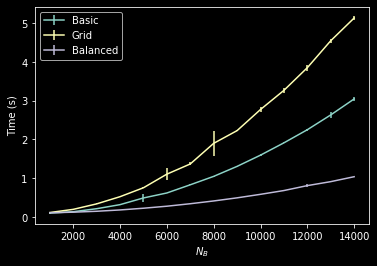

In [41]:
plt.errorbar(N, t_bas_mean/50, 1/25*t_bas_std, label='Basic')
plt.errorbar(N, t_grid_mean/50, 1/25*t_grid_std, label='Grid')
plt.errorbar(N, t_bal_mean/50, 1/25*t_bal_std, label='Balanced')
plt.xlabel('$N_B$')
plt.ylabel('Time (s)')
plt.legend()



Ivestigate how the scaling changes when viewing distence is increased.


In [21]:
f_fov = open('bal_fov_test_n4.txt', 'r')
fov_lines = f_fov.readlines()
f_fov.close()

time = np.array([line.split()[-1] for line in fov_lines]).astype('float')
N = np.array([line.split()[1] for line in fov_lines]).astype('int')
fov = np.array([line.split()[-2] for line in fov_lines]).astype('float')

In [22]:
N_s = N.reshape(10, 3, 8)[0, 0, :]
fov_s = fov.reshape(10, 3, 8)[:, 0, 0]
time_s_mean = np.mean(time.reshape(10, 3, 8), axis=1)
time_s_std = np.std(time.reshape(10, 3, 8), axis=1)


[1.04580924e-06 2.13132547e-03 2.52367132e+00]
[ 2.79764623e-06 -1.36726101e-05  2.67504987e+00]
[3.34705171e-06 4.35071900e-05 2.62104194e+00]
[4.58390509e-06 6.45951950e-05 2.63640625e+00]
[7.26464457e-06 2.29467097e-05 2.63314616e+00]


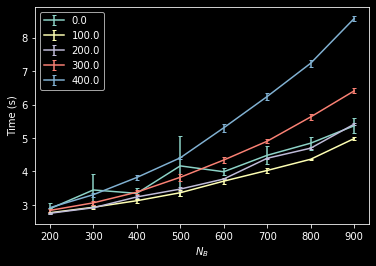

In [23]:
for i in range(0, len(fov_s), 2):
    plt.errorbar(N_s, time_s_mean[i],  time_s_std[i], capsize=2, label=fov_s[i])
    print(np.polyfit(N_s, time_s_mean[i], 2))
plt.xlabel('$N_B$')
plt.ylabel('Time (s)')
plt.legend()

Investigate the speed up with number of processors 


In [46]:
def parse_proc_scaling(f_name, reps=3):
    f = open(f_name, 'r')
    lines = f.readlines()
    time = np.array([line.split()[-1] for line in lines]).astype('float')
    procs = np.array([line.split()[0] for line in lines]).astype('int')
    
    sort_idx = np.argsort(procs)
    procs = procs[sort_idx].reshape(-1, reps)
    time = time[sort_idx].reshape(-1, reps)

    f.close()
    return procs, time

In [54]:
p_bas, t_bas = parse_proc_scaling('./../results/proc_scaling/bal_proc.txt')
t_bas_mean, t_bas_std = np.mean(t_bas, axis=1), np.std(t_bas, axis=1)

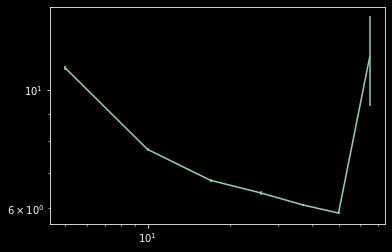

In [58]:
plt.errorbar(p_bas[:, 0], t_bas_mean, t_bas_std)
plt.xscale('log')
plt.yscale('log')